# Stroke Prediction

Especially now that the aging population is getting worse, and many elders live alone. If we can predict stroke signs based on symptoms, patients can be treated in advance and pay attention to daily life. 

__Data Information__

We will be working with data from Kaggle: [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) 

This data includes gender, age, various diaseases and living habit.

__Research Question__

Can we predict the probability of a person getting a stroke and prevent it from happening through treatment or reduce the precipitating factor?

### Import Library 

In [489]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame

### Import Data

In [490]:
stroke_df = pd.read_csv('/Users/chunyuzhang/Downloads/healthcare-dataset-stroke-data.csv',index_col='id')

In [491]:
# Use head()method to check we have our data load correctly 
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [492]:
# Use info() to understand our data
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


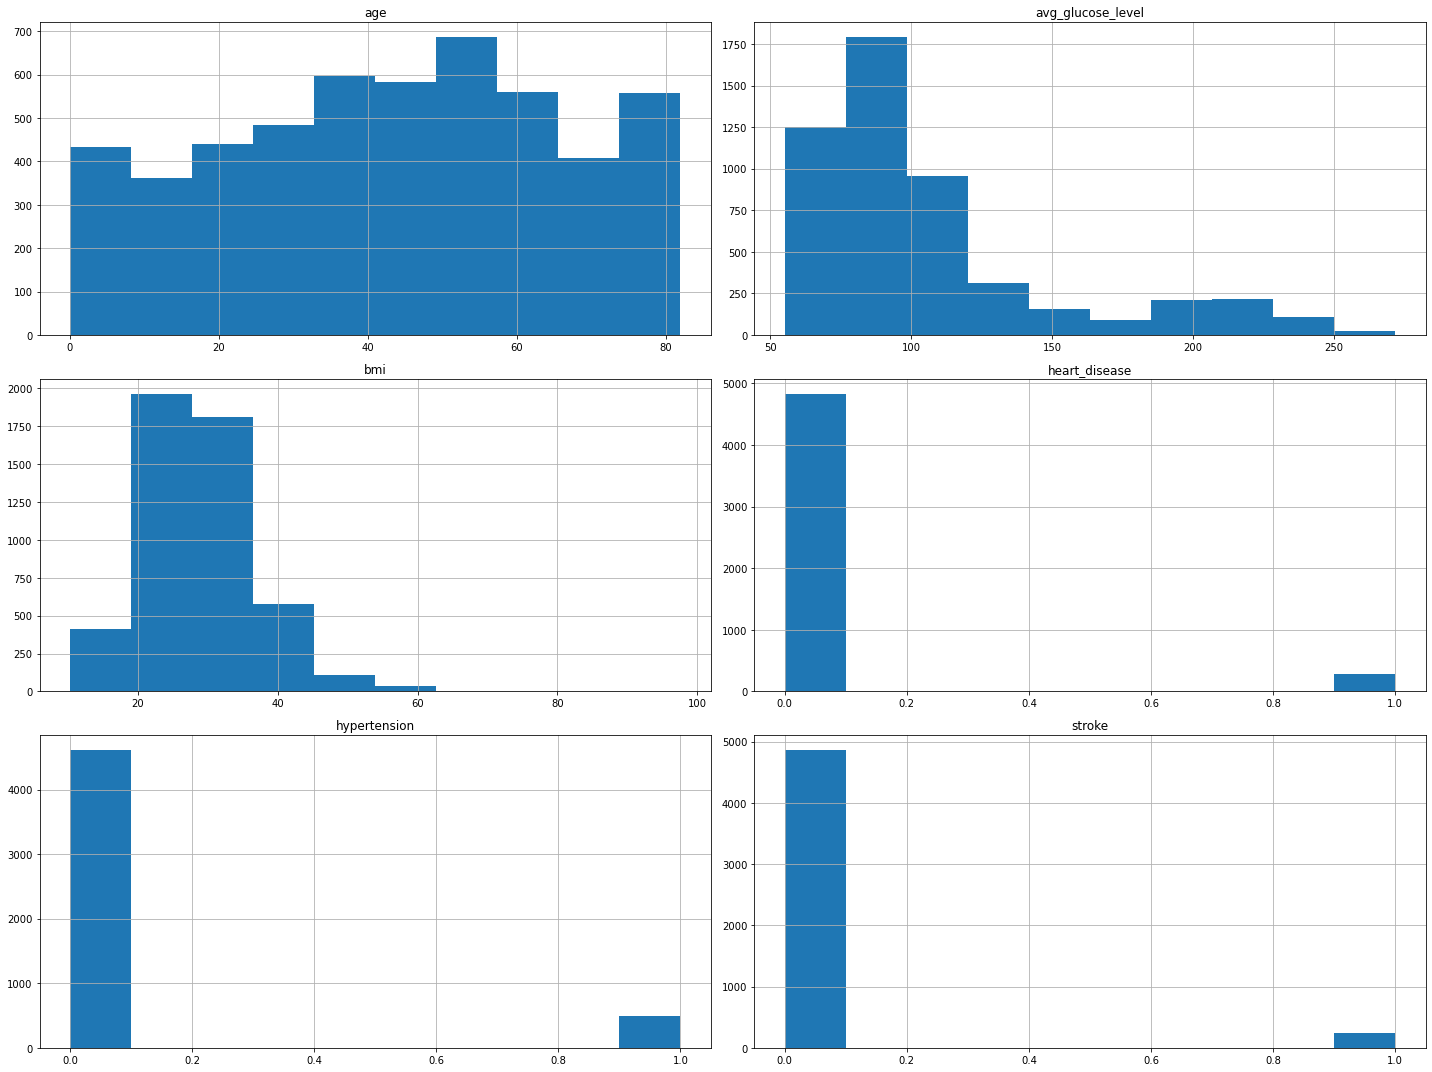

In [493]:
# Lets understand the distribution of our dataset
stroke_df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()


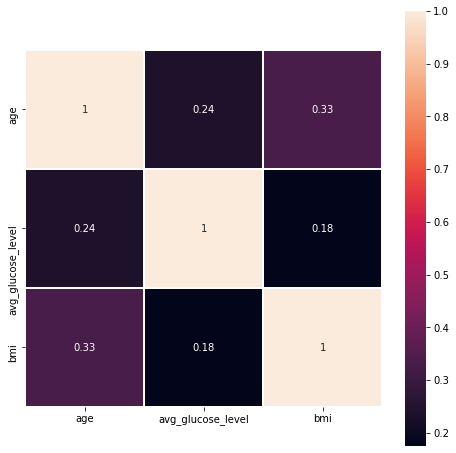

In [494]:
# our numerical Variables are age, avg_glucose_level and bmi with 
# no visible outliers
# lets get the corrlation heatmap

numerical_var = ['age','avg_glucose_level','bmi']

corrmat_df = stroke_df[numerical_var].corr()

plt.figure(figsize = (8,8))
sns.heatmap(corrmat_df, square=True,annot= True,linewidth=.5)
plt.show()

# Fulfill the assumption of low corrlation between variables

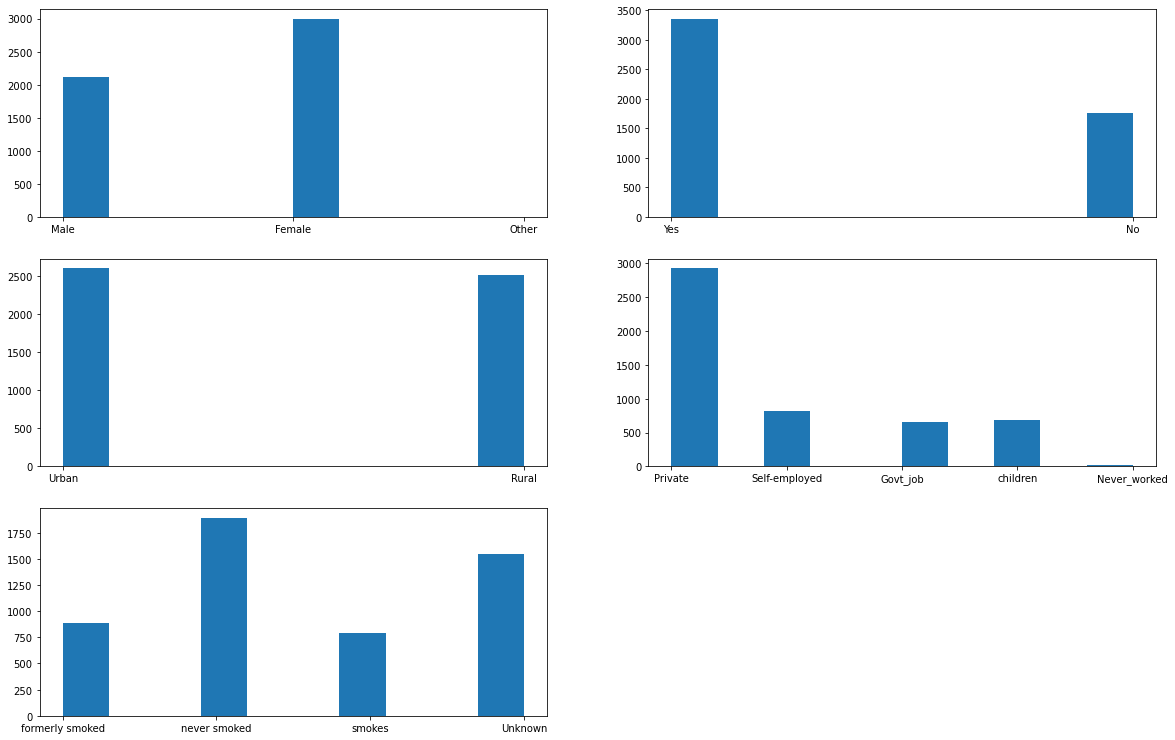

In [495]:
# visualization of categorical variables
plt.figure(figsize=(20,13))

plt.subplot(3,2,1)
plt.hist(stroke_df['gender'])

plt.subplot(3,2,2)
plt.hist(stroke_df['ever_married'])

plt.subplot(3,2,3)
plt.hist(stroke_df['Residence_type'])

plt.subplot(3,2,4)
plt.hist(stroke_df['work_type'])

plt.subplot(3,2,5)
plt.hist(stroke_df['smoking_status'])

plt.show()

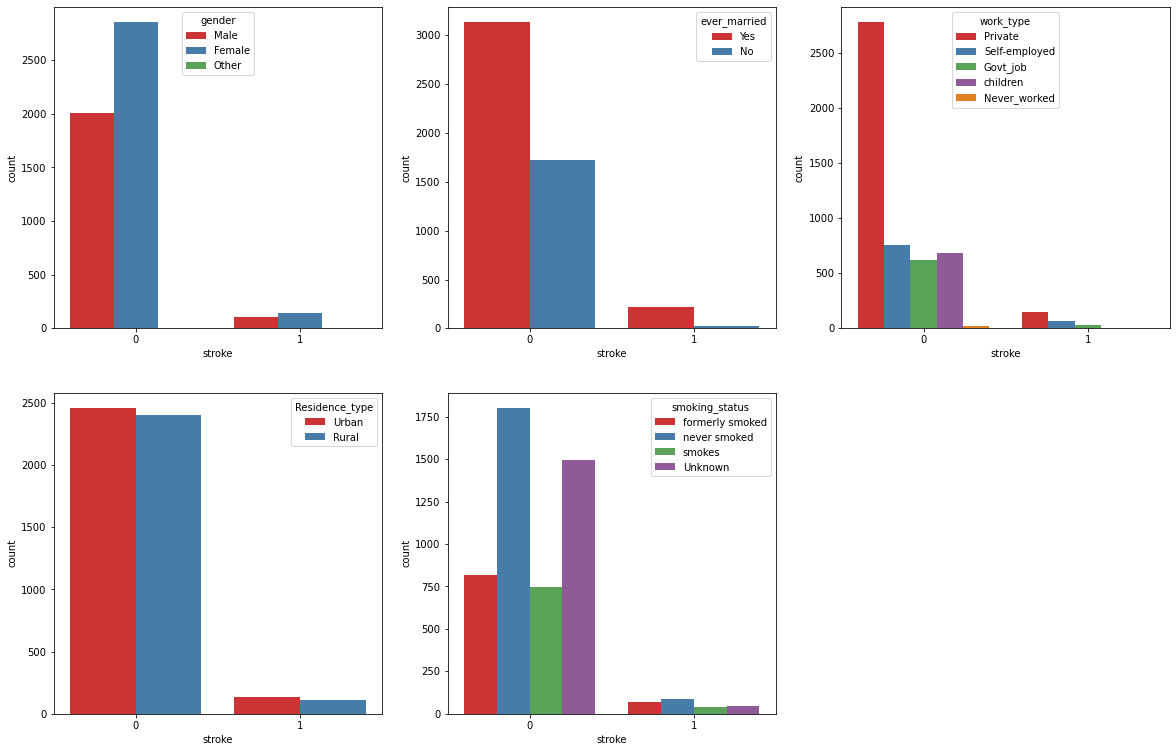

In [496]:
# Since our our prediction target is stroke
# lets Plot counts for each combination

import seaborn as sns

plt.figure(figsize=(20,13))
u = 1

for col in stroke_df:
    if stroke_df[col].dtypes == 'O':
        plt.subplot(2,3,u)
        sns.countplot(x="stroke", hue=col, data=stroke_df,palette='Set1')
        u = u+1
        
plt.show()

As we can see, we have only three numerical variables and mostly categorical variables so that we can use the classification model for our prediction.

Before building our model, use feature_importances_() to see if we can reduce nonsignificant variables. 

In [497]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Lets change the object to int/float so that the classifier can be run

In [498]:
df2 = stroke_df.iloc[:,[0,4,5,6,9]].columns.values.tolist()

In [499]:
for i in range(len(df2)):
    stroke_df[df2[i]] = LabelEncoder().fit_transform(stroke_df[df2[i]])

In [500]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [501]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 639.1 KB


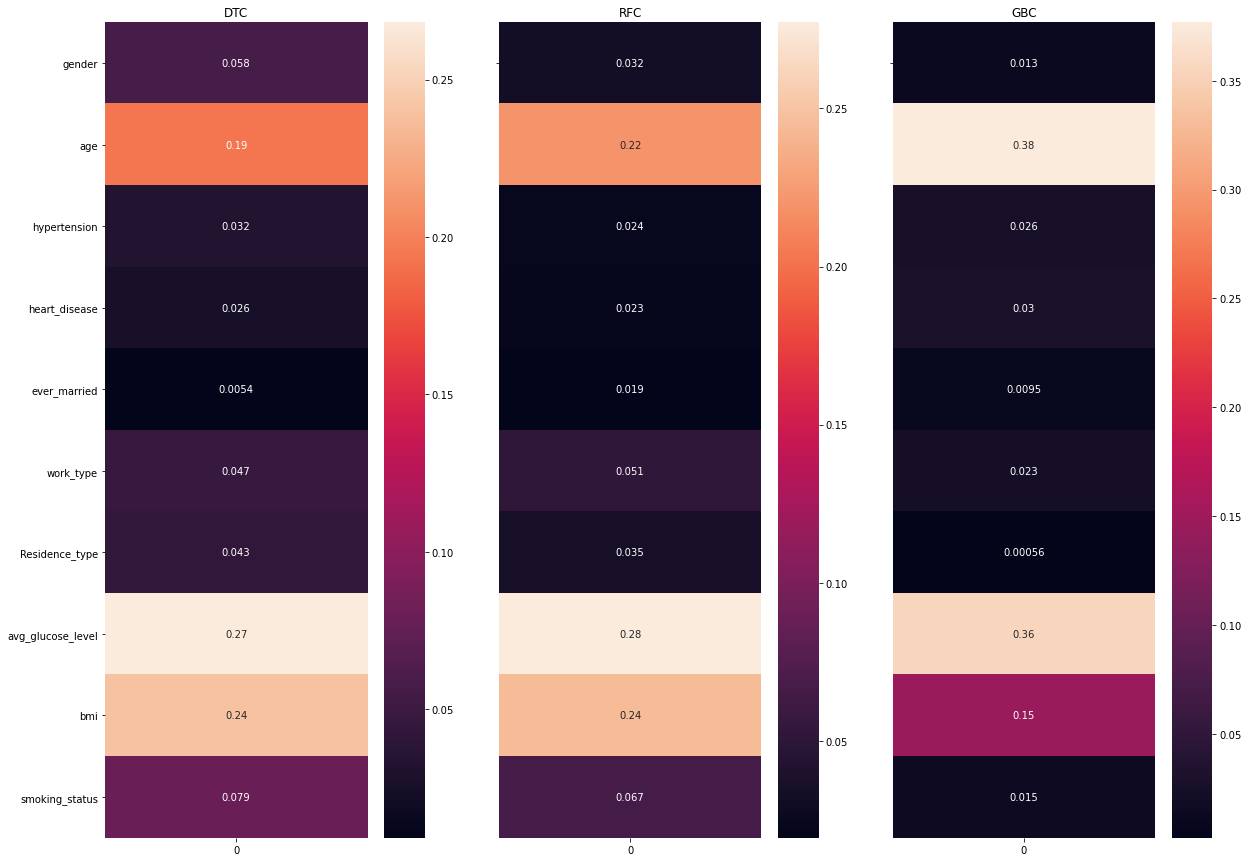

In [502]:
# As we can see the info above， BMI has 201 missing value.
# Since our data is big enough, we can drop our missing value

Y = stroke_df.dropna().stroke
X = stroke_df.dropna().drop(columns='stroke')

DTC = DecisionTreeClassifier().fit(X,Y)
RFC = RandomForestClassifier().fit(X,Y)
GBC = GradientBoostingClassifier().fit(X,Y)

impDTC = DTC.feature_importances_
impRFC = RFC.feature_importances_
impGBC = GBC.feature_importances_

plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
sns.heatmap(data=np.expand_dims(impDTC,axis=1),annot= True,robust=True,yticklabels=X.columns.tolist())
plt.title('DTC')

plt.subplot(1,3,2)
sns.heatmap(data=np.expand_dims(impRFC,axis=1),annot= True,robust=True,yticklabels=[None])
plt.title('RFC')

plt.subplot(1,3,3)
sns.heatmap(data=np.expand_dims(impGBC,axis=1),annot= True,robust=True,yticklabels=[None])
plt.title('GBC')

plt.show()

According to the result, three classifiers treat variables differently. We can run all three to find the best performer.

Variable ever_married is less importnt in all three classifiers.

In [503]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [504]:
counter = Counter(Y)

In [505]:
print(counter)

Counter({0: 4700, 1: 209})


In [506]:
X = X.dropna().drop(columns='ever_married')


In [507]:
oversample = SMOTE()

In [508]:
X, Y = oversample.fit_resample(X, Y)

In [509]:
counter2 = Counter(Y)

In [510]:
print(counter2)

Counter({1: 4700, 0: 4700})


# Create Models

### DecisionTreeClassifier

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=2)

In [512]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier().fit(X_train,y_train)

predict_dtc = dtc.predict(X_test)

confusion = confusion_matrix(y_test, predict_dtc, labels=[1, 0])

print('accuracy score: %s' % dtc.score(X_test, y_test))

accuracy score: 0.9140425531914894


In [513]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


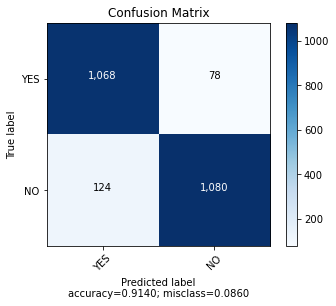

In [514]:
plot_confusion_matrix(cm=confusion, target_names = ['YES', 'NO'], title = 'Confusion Matrix',normalize=False)

### RandomForestClassifier

In [515]:
rfc = ensemble.RandomForestClassifier().fit(X_train,y_train)

predict_rfc = rfc.predict(X_test)

confusion_rfc = confusion_matrix(y_test, predict_rfc, labels=[1, 0])

print('accuracy score: %s' % rfc.score(X_test, y_test))

accuracy score: 0.9497872340425532


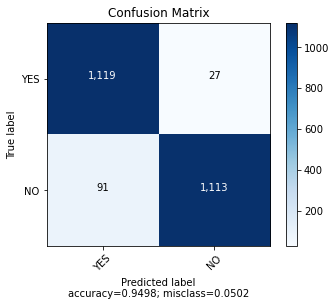

In [516]:
plot_confusion_matrix(cm=confusion_rfc, target_names = ['YES', 'NO'], title = 'Confusion Matrix',normalize=False)

### GradientBoostingClassifier

In [517]:
gbc = ensemble.GradientBoostingClassifier().fit(X_train,y_train)

predict_gbc = gbc.predict(X_test)

confusion_gbc = confusion_matrix(y_test, predict_gbc, labels=[1, 0])

print('accuracy score: %s' % gbc.score(X_test, y_test))

accuracy score: 0.8795744680851064


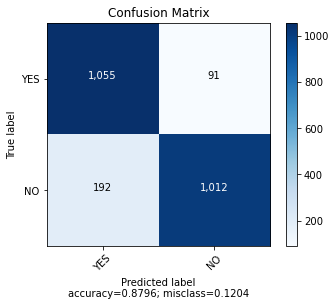

In [518]:
plot_confusion_matrix(cm=confusion_gbc, target_names = ['YES', 'NO'], title = 'Confusion Matrix',normalize=False)

In [519]:
# since the feature_importances_ result shows residence_type is least important 
# lets drop it to see if we can have better Performance 
X2 = X.dropna().drop(columns='Residence_type')
X2, Y = oversample.fit_resample(X2, Y)

X_train2, X_test2, y_train, y_test = train_test_split(X2, Y, random_state=2)

In [520]:
gbc2 = ensemble.GradientBoostingClassifier().fit(X_train2,y_train)

predict_gbc2 = gbc2.predict(X_test2)

confusion_gbc2 = confusion_matrix(y_test, predict_gbc2, labels=[1, 0])

print('accuracy score: %s' % gbc2.score(X_test2, y_test))

accuracy score: 0.8680851063829788


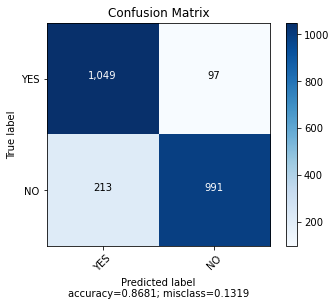

In [521]:
plot_confusion_matrix(cm=confusion_gbc2, target_names = ['YES', 'NO'], title = 'Confusion Matrix',normalize=False)

The dataset with no residence_type has a higher accuracy score, although it's a little.

In [522]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score

print("-----------GradientBoostingClassifier--------------------")
accuracy = accuracy_score(y_test, predict_gbc)
precision = precision_score(y_test, predict_gbc)
recall = recall_score(y_test, predict_gbc)
f1 = f1_score(y_test, predict_gbc)
fbeta_precision = fbeta_score(y_test, predict_gbc, 0.5)
fbeta_recall = fbeta_score(y_test, predict_gbc, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print("---------------------------------------------------------")
print("-----------GradientBoostingClassifier2-------------------")
accuracy = accuracy_score(y_test, predict_gbc2)
precision = precision_score(y_test, predict_gbc2)
recall = recall_score(y_test, predict_gbc2)
f1 = f1_score(y_test, predict_gbc2)
fbeta_precision = fbeta_score(y_test, predict_gbc2, 0.5)
fbeta_recall = fbeta_score(y_test, predict_gbc2, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print("---------------------------------------------------------")

print("--------------RandomForestClassifier---------------------")
accuracy = accuracy_score(y_test, predict_rfc)
precision = precision_score(y_test, predict_rfc)
recall = recall_score(y_test, predict_rfc)
f1 = f1_score(y_test, predict_rfc)
fbeta_precision = fbeta_score(y_test, predict_rfc, 0.5)
fbeta_recall = fbeta_score(y_test, predict_rfc, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print("---------------------------------------------------------")


print("--------------DecisionTreeClassifier---------------------")
accuracy = accuracy_score(y_test, predict_dtc)
precision = precision_score(y_test, predict_dtc)
recall = recall_score(y_test, predict_dtc)
f1 = f1_score(y_test, predict_dtc)
fbeta_precision = fbeta_score(y_test, predict_dtc, 0.5)
fbeta_recall = fbeta_score(y_test, predict_dtc, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print("---------------------------------------------------------")

-----------GradientBoostingClassifier--------------------
Accuracy score: 0.88
Precision score: 0.85
Recall score: 0.92
F1 score: 0.88
Fbeta score favoring precision: 0.86
FBeta score favoring recall: 0.90
---------------------------------------------------------
-----------GradientBoostingClassifier2-------------------
Accuracy score: 0.87
Precision score: 0.83
Recall score: 0.92
F1 score: 0.87
Fbeta score favoring precision: 0.85
FBeta score favoring recall: 0.90
---------------------------------------------------------
--------------RandomForestClassifier---------------------
Accuracy score: 0.95
Precision score: 0.92
Recall score: 0.98
F1 score: 0.95
Fbeta score favoring precision: 0.93
FBeta score favoring recall: 0.97
---------------------------------------------------------
--------------DecisionTreeClassifier---------------------
Accuracy score: 0.91
Precision score: 0.90
Recall score: 0.93
F1 score: 0.91
Fbeta score favoring precision: 0.90
FBeta score favoring recall: 0.92
--

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Since we dont want to miss any possible stroke case, we will going to choose f beta score favoring recall to determine which model performance better. 

#### Random Forest  > Decision Tree > Gradient Boosting

Random forest model have better performance.


Since we have use SMOTE to balance our original class, Lets check check the roc curve

In [523]:
from sklearn.metrics import roc_curve

probs = rfc.predict_proba(X_test)[:, 1]
print(probs[1:30])

fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])



[0.03 0.99 1.   0.96 0.92 0.42 0.03 0.05 0.82 0.   1.   0.   0.32 0.
 0.32 0.93 0.   0.98 0.67 0.   0.85 0.99 0.   0.   0.83 0.01 0.93 0.
 0.21]
[0.         0.00083056 0.00083056 0.00166113 0.00249169 0.00249169
 0.00249169 0.00332226 0.00415282 0.00415282 0.00415282 0.00415282
 0.00581395 0.00664452 0.00664452 0.00913621 0.01245847 0.01328904
 0.0141196  0.01495017 0.01744186 0.01744186 0.01993355 0.02159468
 0.02242525 0.02574751 0.02574751 0.02657807 0.03156146]
[0.20942408 0.34031414 0.45462478 0.5122164  0.56719023 0.61431065
 0.64659686 0.68411867 0.70855148 0.73211169 0.7574171  0.78708551
 0.80191972 0.81326353 0.82984293 0.83682373 0.84467714 0.85165794
 0.86038394 0.86561955 0.87172775 0.87609075 0.88219895 0.88568935
 0.89354276 0.90314136 0.90575916 0.91361257 0.91797557]
[1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71]


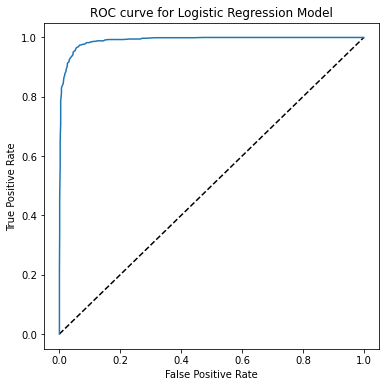

In [524]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

The top-left corner of this graph is the ideal spot: it minimizes the false positive rate and maximizes the true positive rate.

In [485]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))


Accuracy scores for the five folds:  [0.93971631 0.92695035 0.93475177 0.95460993 0.93617021]
Mean cross-validation score: 0.938


Based on the scores, this model is able to predict consistently high on all five folds of the dataset. 

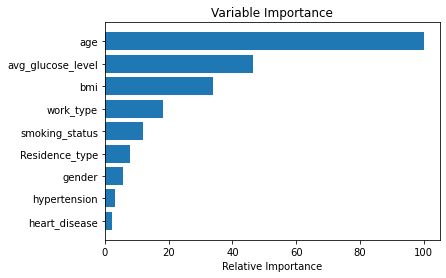

In [484]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We have met our goal of accurately predict the probability of a person getting a stroke and find the precipitating factor to prevent it from happening.